# Classification

Another general task in data analysis and machine learning is classification. 

Classification, in general, is the process of predicting the 'class' of datapoints, meaning to assign a label to the data point, or assign them to a grouping or cluster. 

Classification is a type of supervised learning, meaning we typically have some data for which we know the classes, and we want to learn a procedure that can use this information (the data with known labels), to learn a mapping from data to labels that we can apply to new data. 

Note that if we have data that we are trying to categorize, but don't already know any labels, we typically call this clustering. 

Classification can also be thought of as the categorical version of prediction. Prediction, as we've talked about it, is process of predicting a continuous output from a set of features. Classification is the same idea, except in case we are predicting a discrete category (or label). 

<div class="alert alert-success">
Classification is process of categorizing data - of assigning data points to predefined groups (clusters) or labels. 
</div>

<div class="alert alert-info">
<a href="https://en.wikipedia.org/wiki/Statistical_classification" class="alert-link">Classification</a>
article from wikipedia. 
</div>

## Support Vector Machines

There are many algorithms for doing classification.

For this example, we are going to use Support Vector Machines (SVMs) as an example algorithm. 

SVM is one of the most common algorithms for classification. SVMs are an algorithm that seeks to learn a boundary - or dividing line - between groups of data of interest. Once we learn this boundary, we can label datapoints based on where they sit relative to this boundary - basically which side of the line they are on. 

To separate the data, we want the dividing line, or 'decision boundary' that separates the data. There might be many different lines that do this. To try and find the best solution, SVMs try to learn the learn that has the greatest separation between the classes. To do so, SVMs use 'support vectors', which are datapoints nearby the boundary, that are used to calculate the line of greatest separation. 

<div class="alert alert-success">
Support Vector Machines are a supervised classification algorithm.
</div>

<div class="alert alert-info">
This 
<a href=https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72 class="alert-link">article</a>
provides a nice overview of the SVM algorithm. This is also a code-based explainer from
<a href=http://scikit-learn.org/stable/modules/svm.html class="alert-link">scikit-learn</a>.
</div>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Imports - from scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Data Generation

In this example, we will generate some 2 dimensional data that comes from two different groups. 

This training data has labels, meaning for each data point we also know which group it comes from. 

We will then use a SVM classification model, to try and learn the decision boundary between the groups of data. If we are successful at learning a decision boundary, we can use this to predict the label of new datapoints.

In [2]:
# Setting for generating some random data
n_points = 50             # Total number of data points
label_prop = 0.5          # Proportion of points in class 1

# Initialize data matrix (as zeros)
data = np.zeros(shape=[n_points, 2])

# Set up the number of data points in each class
n_data_1 = int(n_points * label_prop)
n_data_2 = n_points - n_data_1

# Generate the data
data[0:n_data_1, 0] = np.abs(np.random.randn(n_data_1))
data[0:n_data_1, 1] = np.abs(np.random.randn(n_data_1))
data[n_data_2:, 0] = np.abs(np.random.randn(n_data_1)) + 2
data[n_data_2:, 1] = np.abs(np.random.randn(n_data_1)) + 2

# Create the labels vector
labels = np.array([0] * n_data_1 + [1] * n_data_2)

### Data Visualization

Now that we have some data, let's start by plotting it.

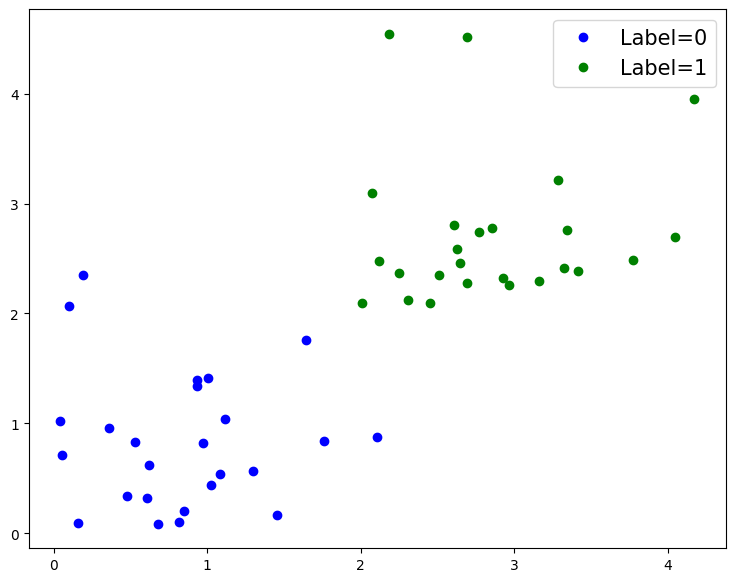

In [3]:
# Plot out labelled data
fig = plt.figure(figsize=[9, 7])
plt.plot(data[0:n_data_1, 0], data[0:n_data_1, 1],
         'b.', ms=12, label="Label=0")
plt.plot(data[n_data_2:, 0], data[n_data_2:, 1],
         'g.', ms=12, label="Label=1")
plt.legend(fontsize=15)

As we can see above, we have two fairly distinct groups of data. 

Now we want to learn a mathematical procedure that can learn the labels of these datapoints.

### Scikit-Learn Objects

The SVM implementation we are using is from `sklearn`.

Scikit-learn, as we have seen before, is object oriented. 

Here, we will again use the typical scikit-learn approach, which is to:

- Initialize a sklearn object for the model we want to use, setting the desired parameters
- Train the model on our labeled training data
- Check performance of our model (in real applications, using a separate, labeled, test set)
- Apply the model to make predictions about new datapoints

In [4]:
# Initialize an SVM classifer object
classifier = SVC(kernel='linear')

In [5]:
# Fit our classification model to our training data
classifier.fit(data, labels)

SVC(kernel='linear')

In [6]:
# Calculate predictions of the model on the training data
train_predictions = classifier.predict(data)

In [7]:
# Print out the performance metrics on the 
print(classification_report(train_predictions, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Now we have a trained classifier!

We have trained our classifier on our data, and also checked it's performance. 

For this example, we have set up a simple example that is easy to predict, so our predictions are very accurate. 

Note that above all we doing is checking if our classifier can predict the labels of the training data - the data that is has already seen. This is _not_ a valid way to properly measure performance of machine learning algorithms. If you wish to continue to explore and use classification and other machine learning algorithms, you will need to look into how to properly test for accuracy, which is outside of the scope of these materials. 

### Predicting New Data Points

Now that we have a trained model, we can use it to predict labels for new data points, including for data points for which we do not know already know the correct label.

In [8]:
# Define a new data point, that we will predict a label for
new_point = np.array([[3, 3]])

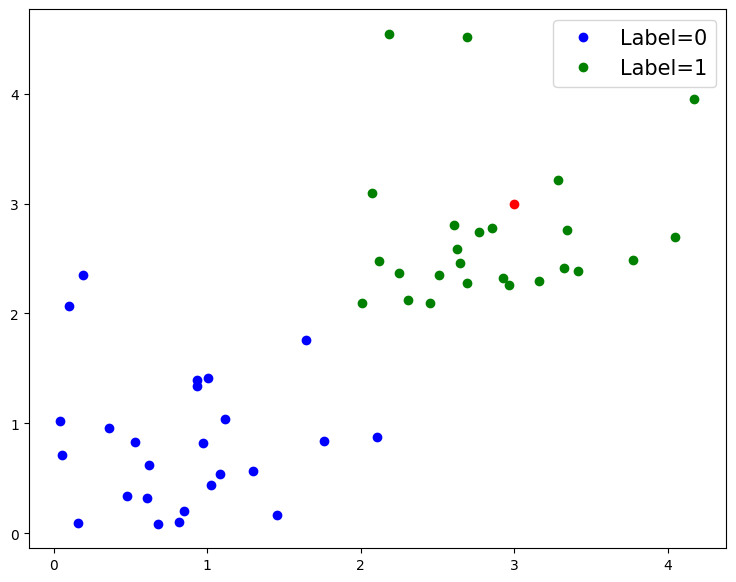

In [9]:
# Add our new point to figure, in red, and redraw the figure
fig.gca().plot(new_point[0][0], new_point[0][1], '.r', ms=12);
fig

In [10]:
# Predict the class of the new data point
prediction = classifier.predict(new_point)
print('Predicted class of new data point is: {}'.format(prediction[0]))

Predicted class of new data point is: 1


### Support Vectors

As we mentioned befor, SVMs use 'support vectors', which are the points closest to the decision boundary, to try and learn the decision boundary with the highest margin (or separation) between the classes. 

Now that we have a trained model, we can have a look at the support vectors, and the decision boundary learned from them. 

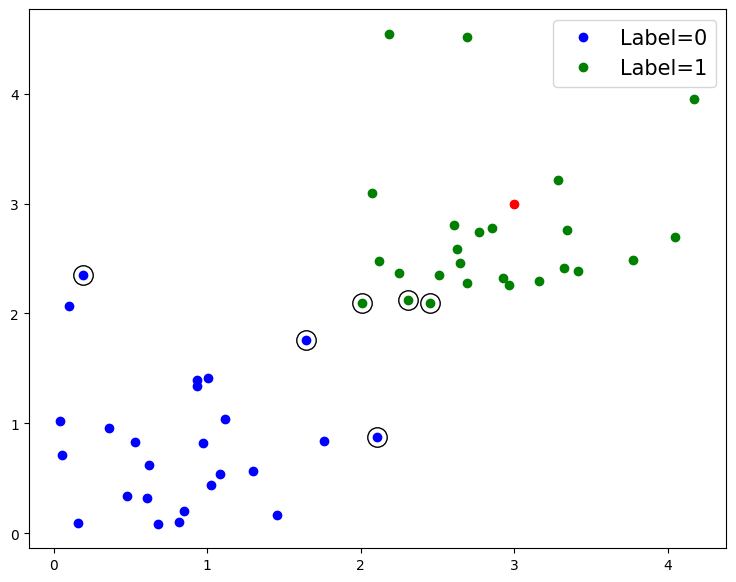

In [11]:
# Add the support vectors to plot, and redraw the figure
#  Support vectors will be indicated by being highlighted with black circles
for row in classifier.support_vectors_:
    fig.gca().plot(row[0], row[1], 'ok', ms=14,  mfc='none')
fig

As we can see, the support vectors, which are identified with some meta-data that is stored in the model object, are some datapoints at the end of the classes - those closest to the boundary. 

### Drawing the decision boundary

We can also draw the decision boundary - the boundary at which our model thinks the labels switch between groups.

<div class="alert alert-info">
This following code to find and visualize the decision boundary and margins is adapted from this 
<a href="http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py" class="alert-link">sklearn example</a>.
</div>

In [12]:
# Grab the current plot, and find axis sizes
ax = fig.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of data to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);

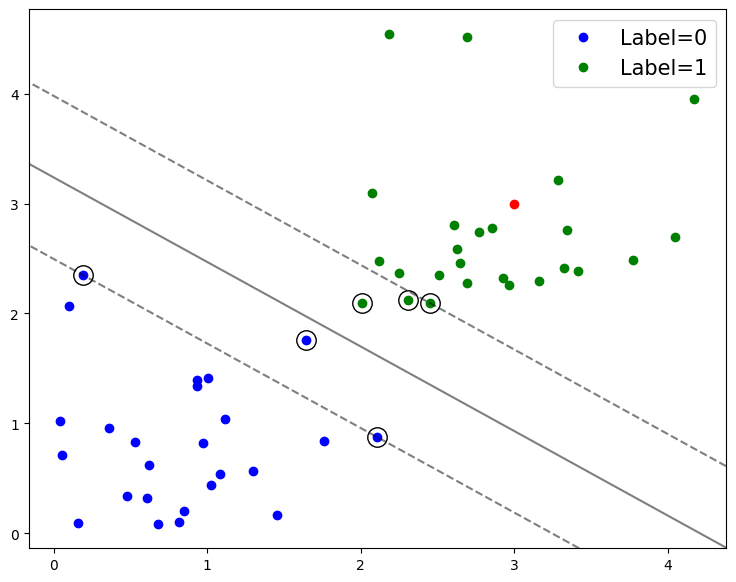

In [13]:
# Redraw figure
fig

In the above plot, the solid line is the decision boundary that the model has learned. 

The dashed lines are the margins - the separation between the classes that the algorithm is trying to maximize. 

### SVMs in more dimensions

Note that, for simplicity, in this example we have used SVMs to learn a decision boundary in two dimensional data. 

In this case, with 2D data, the decision boundary is a line. 

SVMs also generalize to higher dimensions, and can be applied to data of any dimensionality. In higher dimensional data, the algorithm works the same, and the solution learned is a hyperplane that attempts the separate the data into categories in whatever dimensionality if lives. 

### Conclusions

The example above is a simplified example of an SVM application. With the code above, your are also encouraged to explore SVMs - investigate what happens as you change the data, change some settings, and predict different data points. 

This example is meant as a brief example for using classification models with scikit-learn. Much more information can be found in the `scikit-learn` documentation. 

Classification is a vast area of machine learning, with many tools, algorithms, and approaches that can be applied to data within the realm of data science. This example seeks merely to introduce the basic idea. If you are interested in classification algorithms, then you are recommended to look into resources and classes that focus on machine learning. 